OBJETIVO: Analizar el tiempo que un estudiante demora en pasar todas la materias de cursos básicos. Mecatronica.

# PROCESAMIENTO DE DATOS

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargo los datos en formato excel sin subir al drive porque ahi ocurren cosas extranhas

In [2]:
lectura= pd.read_csv("/datosConcatenadossinCI.csv")
pd.set_option('display.max_columns', None) #para ver todas las columnas, solo se usa una vez

In [3]:
lectura.head()

,Unnamed: 0,danho,ciclo,Cod.Asign,Asignatura,Cod.Car.Sec,Cod.Curso,Convocatoria,Anho,Semestre,Aprobado,Anho.Firma,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,Tercer.Par,Asis,Cuarto.Par,4P_60,id_anony
0,0,2012,1,2402,COMBUSTION,INT9MECANI,13.0,1.0,2012.0,1.0,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,NaN,es_0
1,1,2012,1,2402,COMBUSTION,MEC9-OPT,13.0,1.0,2012.0,1.0,S,2012.0,11.0,14.0,8.0,0.0,0.0,1F-5,0.0,1.0,NaN,NaN,es_1
2,2,2012,1,2402,COMBUSTION,INT9MECANI,13.0,1.0,2012.0,1.0,S,2012.0,24.0,23.0,9.0,0.0,0.0,1F-5,0.0,1.0,NaN,NaN,es_2
3,3,2012,1,2402,COMBUSTION,MEC9-OPT,13.0,1.0,2012.0,1.0,S,2012.0,11.0,14.0,8.0,0.0,0.0,"1F-1,2F-2",0.0,1.0,NaN,NaN,es_3
4,4,2012,1,2402,COMBUSTION,MEC9-OPT,13.0,1.0,2012.0,1.0,N,0.0,11.0,4.0,8.0,0.0,0.0,NaN,0.0,1.0,NaN,NaN,es_4


In [4]:
lectura.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21445 entries, 0 to 21444
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    21445 non-null  int64  
 1   danho         21445 non-null  int64  
 2   ciclo         21445 non-null  int64  
 3   Cod.Asign     21445 non-null  int64  
 4   Asignatura    21445 non-null  object 
 5   Cod.Car.Sec   21445 non-null  object 
 6   Cod.Curso     21444 non-null  float64
 7   Convocatoria  21444 non-null  float64
 8   Anho          21444 non-null  float64
 9   Semestre      21444 non-null  float64
 10  Aprobado      21444 non-null  object 
 11  Anho.Firma    21444 non-null  float64
 12  Primer.Par    21444 non-null  float64
 13  Segundo.Par   21444 non-null  float64
 14  AOT           21444 non-null  float64
 15  Primer.Rec    21444 non-null  float64
 16  Segundo.Rec   21444 non-null  float64
 17  Nota.Final    13660 non-null  object 
 18  Tercer.Par    21444 non-nu

In [5]:
np.unique(lectura["Cod.Car.Sec"])

array(['CGF-175-09', 'CGF-PLS09 ', 'CIV-175-09', 'CIV-PL', 'CIV-PLS09 ',
       'ECA-175-09', 'ECA-PLS09 ', 'ECA9-OPT  ', 'ELE-175-09',
       'ELE-PLS09 ', 'IND-175-09', 'IND-PLS09 ', 'IND-PLS13 ',
       'INT9-PROYT', 'INT9CONSTR', 'INT9ELECTR', 'INT9G-ECO ',
       'INT9MECANI', 'INT9SANEHI', 'INT9SDIGYT', 'INT9TRANSP',
       'MCT-175-09', 'MCT-PLS09 ', 'MCT-PLS13 ', 'MCT9-OPT  ',
       'MEC-175-09', 'MEC-PLS09 ', 'MEC9-OPT  ', 'TIVAS     '],
      dtype=object)

In [6]:
carrera=pd.DataFrame(columns=lectura.columns) # carrera es un dataframe
for car in ['MEC-175-09', 'MEC-PLS09 ','MEC-PLS13 ', 'MEC9-OPT  ']:
     carrera=pd.concat([carrera, lectura[lectura["Cod.Car.Sec"]==car]], axis=0)

In [7]:
np.unique(carrera["Cod.Car.Sec"])


array(['MEC-175-09', 'MEC-PLS09 ', 'MEC9-OPT  '], dtype=object)

In [8]:
pd.set_option('display.max_rows', None) #para ver todas las filas, solo se usauna vez

In [9]:
carrera.head()

,Unnamed: 0,danho,ciclo,Cod.Asign,Asignatura,Cod.Car.Sec,Cod.Curso,Convocatoria,Anho,Semestre,Aprobado,Anho.Firma,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,Tercer.Par,Asis,Cuarto.Par,4P_60,id_anony
4685,4685,2012,1,5634,LEGISLACION,MEC-175-09,10.0,1.0,2012.0,1.0,S,2012.0,14.0,0.0,0.0,0.0,0.0,1F-3,0.0,1.0,NaN,NaN,es_514
4687,4687,2012,1,5634,LEGISLACION,MEC-175-09,10.0,1.0,2012.0,1.0,S,2012.0,19.0,0.0,0.0,0.0,0.0,1F-4,0.0,1.0,NaN,NaN,es_17
4688,4688,2012,1,5634,LEGISLACION,MEC-175-09,10.0,1.0,2012.0,1.0,S,2012.0,13.0,0.0,0.0,0.0,0.0,1F-3,0.0,1.0,NaN,NaN,es_551
4690,4690,2012,1,5634,LEGISLACION,MEC-175-09,10.0,1.0,2012.0,1.0,N,2012.0,8.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,NaN,es_771
4691,4691,2012,1,5634,LEGISLACION,MEC-175-09,10.0,1.0,2012.0,1.0,S,2012.0,16.0,0.0,0.0,0.0,0.0,1F-3,0.0,1.0,NaN,NaN,es_25


In [10]:
allasig= np.unique(carrera['Asignatura']) 
print(allasig)


['ACONDICIONADOR DE AIRE Y REFRIGERACION' 'ALGEBRA LINEAL 1'
 'ALGEBRA LINEAL 2' 'AUTOMATIZACION Y CONTROL' 'AUTOMOTORES' 'CALCULO 1'
 'CALCULO 2' 'CALCULO 3' 'CALCULO 4' 'CALCULO 5'
 'CALIDAD E IMPACTO AMBIENTAL' 'COMBUSTION' 'COMPUTACION'
 'DIBUJO MECANICO' 'DIBUJO TECNICO' 'DINAMICA'
 'DINAMICA DE MAQUINAS Y VIBRACIONES' 'ECONOMIA Y EVALUACION DE PROYECTO'
 'EFICIENCIA ENERGETICA' 'ELECTRONICA BASICA' 'ELECTROTECNIA'
 'ELEMENTOS DE MAQUINAS' 'ENERGIA SOLAR Y BIOMASA' 'ESTATICA' 'FISICA 1'
 'FISICA 2' 'FISICA 3' 'FISICA 4' 'GEOMETRIA ANALITICA'
 'GESTION DE PROYECTOS' 'INGENIERIA DE MANTENIMIENTO'
 'INSTALACIONES INDUSTRIALES'
 'INTRODUCCION A LA FISICA ATOMICA Y MOLECULAR'
 'INTRODUCCION A LA INVESTIGACION' 'INTRODUCCION A LA SIMULACION'
 'INVESTIGACION OPERATIVA' 'LABORATORIO MECANICO 1'
 'LABORATORIO MECANICO 2' 'LABORATORIO MECANICO 3' 'LEGISLACION'
 'MANTENIMIENTO MECANICO' 'MAQUINAS DE FLUJO ' 'MATERIALES 1'
 'MATERIALES 2' 'MECANICA DE FLUIDOS' 'MECANICA DE FLUIDOS AVANZADOS '

tengo que eliminar las materias que no correponden a cursos basicos de un mecatronico

In [11]:
asig_mct_cb=['ALGEBRA LINEAL 1','ALGEBRA LINEAL 2','CALCULO 1', 'CALCULO 2','CALCULO 3','COMPUTACION','DIBUJO TECNICO', 'DINAMICA', 'FISICA 4', 'MECANICA DE MATERIALES','ESTATICA','FISICA 1', 'FISICA 2','FISICA 3', 'TECNOLOGIA DE LOS MATERIALES', 'GEOMETRIA ANALITICA','GEOMETRIA DESCRIPTIVA','CALCULO 4','CALCULO 5','PROBABILIDAD Y ESTADISTICA','PROBABILIDAD Y ESTADISTICA ','QUIMICA GENERAL']
#resp=[elementoU in allasig for elementoU in asig_mct_cb]
#print(resp)

In [12]:
len(asig_mct_cb) 


22

OBSERVACIONES: proba se repite 2 veces y en la malla cambio Elec y circ electricos por electromagnetismo. 
En la malla 2009 hay 20 materias en cb y en la malla 2013 se agrego una mas, geo descriptiva

In [13]:
carrerafiltrada=pd.DataFrame(columns=carrera.columns) # carrerafiltrada es un dataframe con los alumnos de cursos basicos 
for car in asig_mct_cb:
     carrerafiltrada=pd.concat([carrerafiltrada, carrera[carrera["Asignatura"]==car]], axis=0)

In [14]:
carrerafiltrada.head()

,Unnamed: 0,danho,ciclo,Cod.Asign,Asignatura,Cod.Car.Sec,Cod.Curso,Convocatoria,Anho,Semestre,Aprobado,Anho.Firma,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,Tercer.Par,Asis,Cuarto.Par,4P_60,id_anony
15005,7574,2012,2,9004,ALGEBRA LINEAL 1,MEC-PLS09,1.0,1.0,2012.0,2.0,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,NaN,es_1372
15018,7587,2012,2,9004,ALGEBRA LINEAL 1,MEC-PLS09,1.0,1.0,2012.0,2.0,N,2012.0,5.0,24.0,8.0,0.0,0.0,"1F-1,2F-1",0.0,1.0,NaN,NaN,es_1525
15022,7591,2012,2,9004,ALGEBRA LINEAL 1,MEC-PLS09,1.0,1.0,2012.0,2.0,S,2012.0,15.0,31.0,10.0,0.0,0.0,1F-4,0.0,1.0,NaN,NaN,es_1528
15044,7613,2012,2,9004,ALGEBRA LINEAL 1,MEC-PLS09,1.0,1.0,2012.0,2.0,N,0.0,10.0,10.0,6.0,27.0,0.0,NaN,0.0,0.0,NaN,NaN,es_1546
15054,7623,2012,2,9004,ALGEBRA LINEAL 1,MEC-PLS09,1.0,1.0,2012.0,2.0,N,0.0,1.0,10.0,8.0,0.0,0.0,NaN,0.0,1.0,NaN,NaN,es_1556


In [15]:

carrerafiltrada= carrerafiltrada.replace(['PROBABILIDAD Y ESTADISTICA ' ],'PROBABILIDAD Y ESTADISTICA')
materias=np.unique(carrerafiltrada['Asignatura']) 


task: Que sucede si un alumno convalida materias para pasar cursos basicos? Por ejemplo Fisica 4 con Electromagnetismo, o C4 con MN, etc(analizar los datos)

In [16]:
cant=np.unique(carrerafiltrada['id_anony']) #esto es para saber la cantidad de alumnos que hay
print(len(cant)) #esta es la cantidad de alumnos que cursan o cursaron cursos basicos

87


In [17]:
#esto sirve para descargar en excel 
#from google.colab import files
#carrerafiltrada.to_csv('carrerafiltrada.csv')
#files.download('carrerafiltrada.csv')

La idea es hacer un dataframe por persona donde podamos ver todas las materias que curso y si curso todas entonces alli evaluar cuanto tiempo tardo en finalizo. 

In [18]:
  materiaspaso=[]
  tardocb=[]
  danhoini=[]
  id=[]
  codcarsec=[]
  anhofin=[]
  recursadas=[]

In [19]:
i=0
for alum in cant:
  paso = 0
  recurso = 0
  tardo=0
  aux= carrerafiltrada[carrerafiltrada['id_anony']==alum]
  plan= np.unique(aux['Cod.Car.Sec'])
  aux2= aux[aux['Aprobado']=='S']
  aux2=aux2.drop_duplicates(subset=['Asignatura'])# agregar anho y ciclo
  paso= len(aux2['Aprobado'])
  aux3=aux[aux['Aprobado']=='N']#agregar anho, ciclo,final?
  recurso= len(aux3['Aprobado'])
  if plan[0] == 'MEC-PLS13' and paso>20:
    i+=1
    tardo = aux['Anho'].max() - aux['danho'].min()
    print(i,tardo)
  if plan[0]!='MEC-PLS13' and paso>19:
    i+=1
    tardo = aux['Anho'].max() - aux['danho'].min()
    print(i,tardo)
  materiaspaso.append(paso)
  tardocb.append(tardo)# histograma
  danhoini.append(aux['danho'].min())
  id.append(alum)
  codcarsec.append(plan[0])
  anhofin.append(aux['Anho'].max() )
  recursadas.append(recurso)

In [20]:
len(materiaspaso)

87

In [21]:
new= pd.DataFrame({'danho':danhoini,'id_anony':id,'Cod.Car.Sec':codcarsec,	'Anho':anhofin,'recurso':recursadas,'paso':materiaspaso,'tardoCB':tardocb })
new2=new[new['tardoCB']>0]
new2.head()

,danho,id_anony,Cod.Car.Sec,Anho,recurso,paso,tardoCB


In [22]:
new2['recurso']

Series([], Name: recurso, dtype: int64)

In [23]:
#esto sirve para descargar en excel 
from google.colab import files
carrerafiltrada.to_csv('carrerafiltrada.csv')
files.download('carrerafiltrada.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ahora filtrare por persona, para saber todas las materias que curso cada uno. Luego al tener su listado de materias voy a verificar cuantas veces recurso esa misma materia y eso lo anotare en un data frame como extra 

#REGRESION LINEAL


In [24]:
from sklearn import linear_model, model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


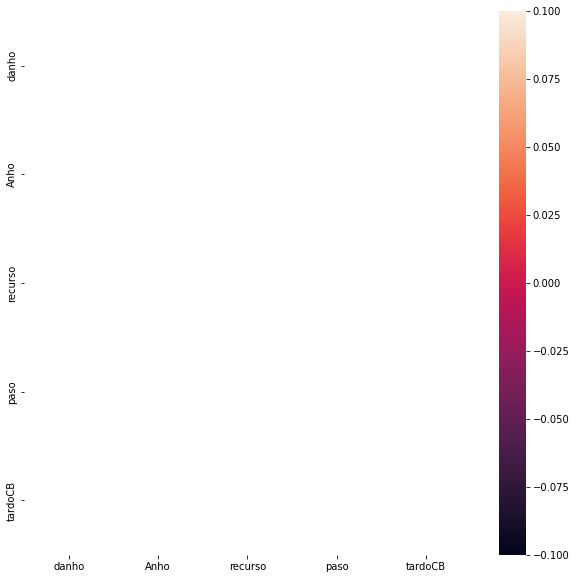

In [25]:
fig,ax= plt.subplots(figsize=(10,10))
sns.heatmap(new2.corr())

In [26]:
x=new2[['paso','danho']].values #stat model buscar
y=new2['tardoCB'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.11,random_state=150)

ValueError: ignored

In [28]:
LR = LinearRegression()
LR.fit(X_train,y_train)

NameError: ignored

In [29]:
len(X_test)

NameError: ignored

Predecimos

In [30]:
predictions = LR.predict(X_test)
plt.scatter(y_test,predictions)

NameError: ignored

In [31]:
plt.scatter(X_train,y_train)
len(X_train)

NameError: ignored

In [32]:
#me falta la recta, mismo grafico y mse todo con el danhoc